In [ ]:
# import library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.random import randn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df  

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.size

7982

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [ ]:
# encoded dataset

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder() 
df['Gender']=le.fit_transform(df['Gender'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['Married']=le.fit_transform(df['Married'])
df['Loan_ID']=le.fit_transform(df['Loan_ID'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [23]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [ ]:
# fill null values using imputing method

In [30]:
from sklearn.impute import KNNImputer

In [31]:
knn=KNNImputer(n_neighbors=2)

In [32]:
knn=pd.DataFrame(knn.fit_transform(df[['Gender','Dependents','LoanAmount','Loan_Amount_Term','Credit_History']]))

In [33]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [34]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# treat null value by using fillna mean 

In [36]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount']).mean()

In [37]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term']).mean()

In [38]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History']).mean()

In [39]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,342.0,0.842199,2,1
1,1,1,1,1,0,0,4583,1508.0,146.412162,342.0,0.842199,0,0
2,2,1,1,0,0,1,3000,0.0,146.412162,342.0,0.842199,2,1
3,3,1,1,0,1,0,2583,2358.0,146.412162,342.0,0.842199,2,1
4,4,1,0,0,0,0,6000,0.0,146.412162,342.0,0.842199,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,146.412162,342.0,0.842199,0,1
610,610,1,1,3,0,0,4106,0.0,146.412162,342.0,0.842199,0,1
611,611,1,1,1,0,0,8072,240.0,146.412162,342.0,0.842199,2,1
612,612,1,1,2,0,0,7583,0.0,146.412162,342.0,0.842199,2,1


In [41]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [42]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,342.0,0.842199,2,1
1,1,1,1,1,0,0,4583,1508.0,146.412162,342.0,0.842199,0,0
2,2,1,1,0,0,1,3000,0.0,146.412162,342.0,0.842199,2,1
3,3,1,1,0,1,0,2583,2358.0,146.412162,342.0,0.842199,2,1
4,4,1,0,0,0,0,6000,0.0,146.412162,342.0,0.842199,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,146.412162,342.0,0.842199,0,1
610,610,1,1,3,0,0,4106,0.0,146.412162,342.0,0.842199,0,1
611,611,1,1,1,0,0,8072,240.0,146.412162,342.0,0.842199,2,1
612,612,1,1,2,0,0,7583,0.0,146.412162,342.0,0.842199,2,1


In [ ]:
# lests see the data distribution

In [43]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,6.140000e+02,614.0,6.140000e+02,614.000000,614.000000
mean,306.500000,0.838762,0.657980,0.842020,0.218241,0.237785,5403.459283,1621.245798,1.464122e+02,342.0,8.421986e-01,1.037459,0.687296
std,177.390811,0.421752,0.484971,1.120531,0.413389,0.534737,6109.041673,2926.248369,1.280020e-12,0.0,9.333477e-15,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,1.464122e+02,342.0,8.421986e-01,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,1.464122e+02,342.0,8.421986e-01,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,1.464122e+02,342.0,8.421986e-01,1.000000,1.000000
75%,459.750000,1.000000,1.000000,2.000000,0.000000,0.000000,5795.000000,2297.250000,1.464122e+02,342.0,8.421986e-01,2.000000,1.000000
max,613.000000,2.000000,2.000000,4.000000,1.000000,2.000000,81000.000000,41667.000000,1.464122e+02,342.0,8.421986e-01,2.000000,1.000000


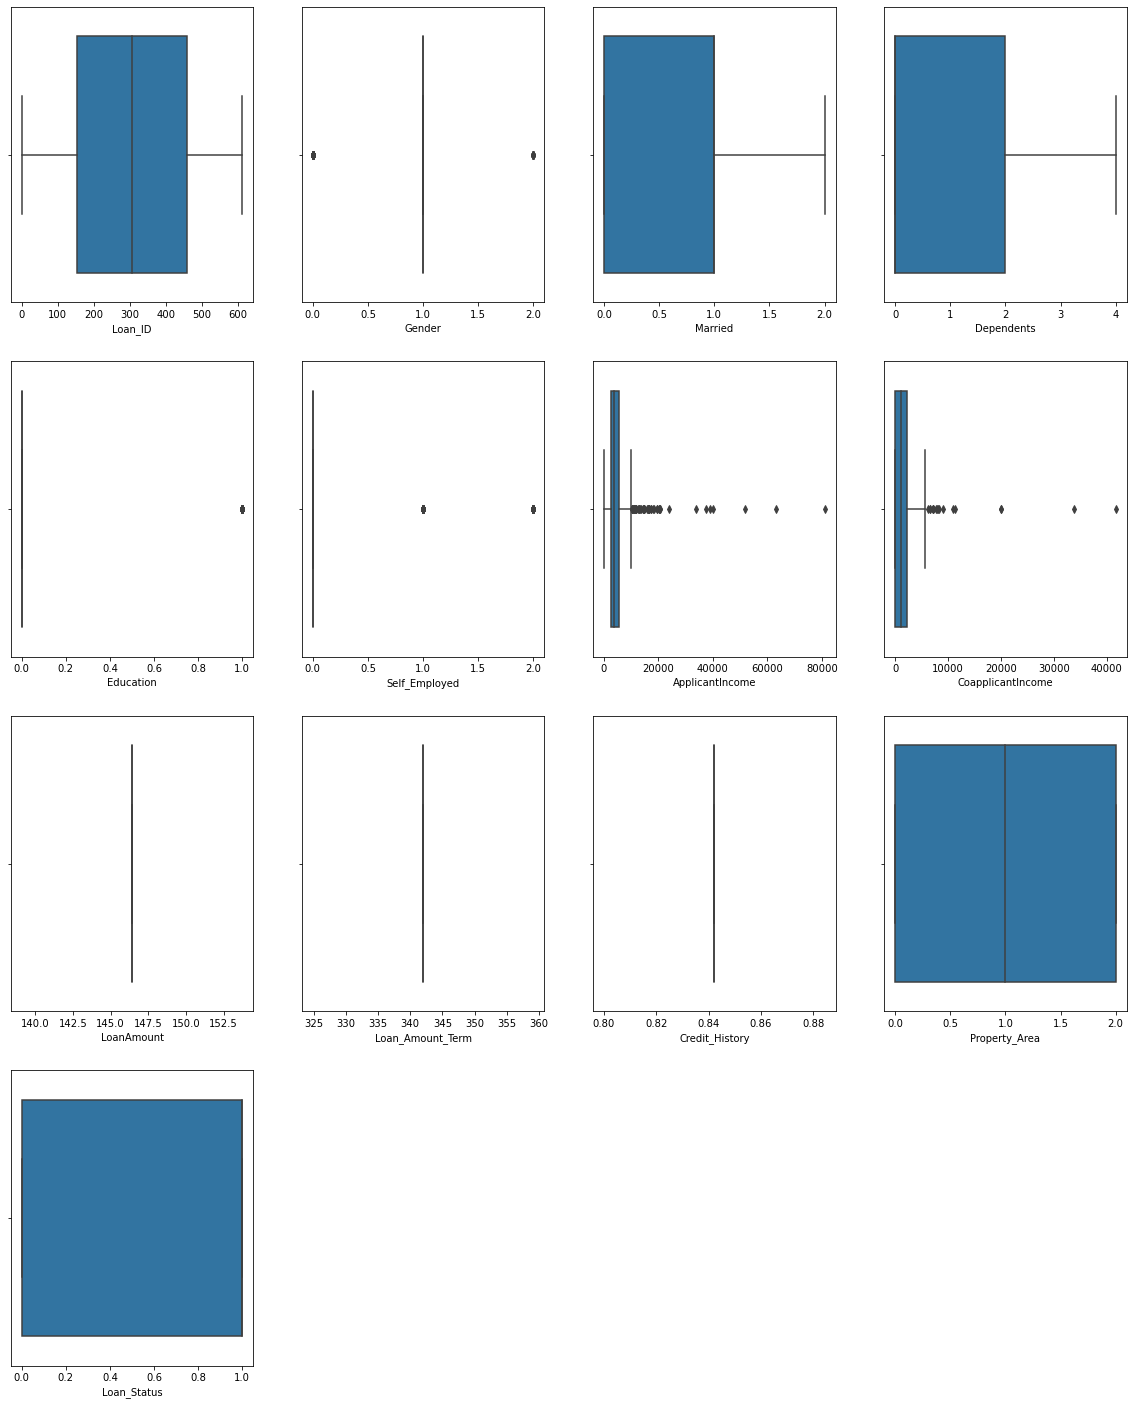

In [44]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in df:
    if plotnumber<=30:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column)
        plotnumber+=1
plt.show()  

In [ ]:
# treat outliers

In [46]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1

In [47]:
ai=(q3.ApplicantIncome+(1.5*iqr.ApplicantIncome))
index=np.where(df['ApplicantIncome']>ai)
df=df.drop(df.index[index])
df.shape
df.reset_index()

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,0,0,0,0,5849,0.0,146.412162,342.0,0.842199,2,1
1,1,1,1,1,1,0,0,4583,1508.0,146.412162,342.0,0.842199,0,0
2,2,2,1,1,0,0,1,3000,0.0,146.412162,342.0,0.842199,2,1
3,3,3,1,1,0,1,0,2583,2358.0,146.412162,342.0,0.842199,2,1
4,4,4,1,0,0,0,0,6000,0.0,146.412162,342.0,0.842199,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,609,609,0,0,0,0,0,2900,0.0,146.412162,342.0,0.842199,0,1
560,610,610,1,1,3,0,0,4106,0.0,146.412162,342.0,0.842199,0,1
561,611,611,1,1,1,0,0,8072,240.0,146.412162,342.0,0.842199,2,1
562,612,612,1,1,2,0,0,7583,0.0,146.412162,342.0,0.842199,2,1


In [48]:
ci=(q3.CoapplicantIncome+(1.5*iqr.CoapplicantIncome))
index=np.where(df['CoapplicantIncome']>ci)
df=df.drop(df.index[index])
df.shape
df.reset_index()

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,0,0,0,0,5849,0.0,146.412162,342.0,0.842199,2,1
1,1,1,1,1,1,0,0,4583,1508.0,146.412162,342.0,0.842199,0,0
2,2,2,1,1,0,0,1,3000,0.0,146.412162,342.0,0.842199,2,1
3,3,3,1,1,0,1,0,2583,2358.0,146.412162,342.0,0.842199,2,1
4,4,4,1,0,0,0,0,6000,0.0,146.412162,342.0,0.842199,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,609,609,0,0,0,0,0,2900,0.0,146.412162,342.0,0.842199,0,1
544,610,610,1,1,3,0,0,4106,0.0,146.412162,342.0,0.842199,0,1
545,611,611,1,1,1,0,0,8072,240.0,146.412162,342.0,0.842199,2,1
546,612,612,1,1,2,0,0,7583,0.0,146.412162,342.0,0.842199,2,1


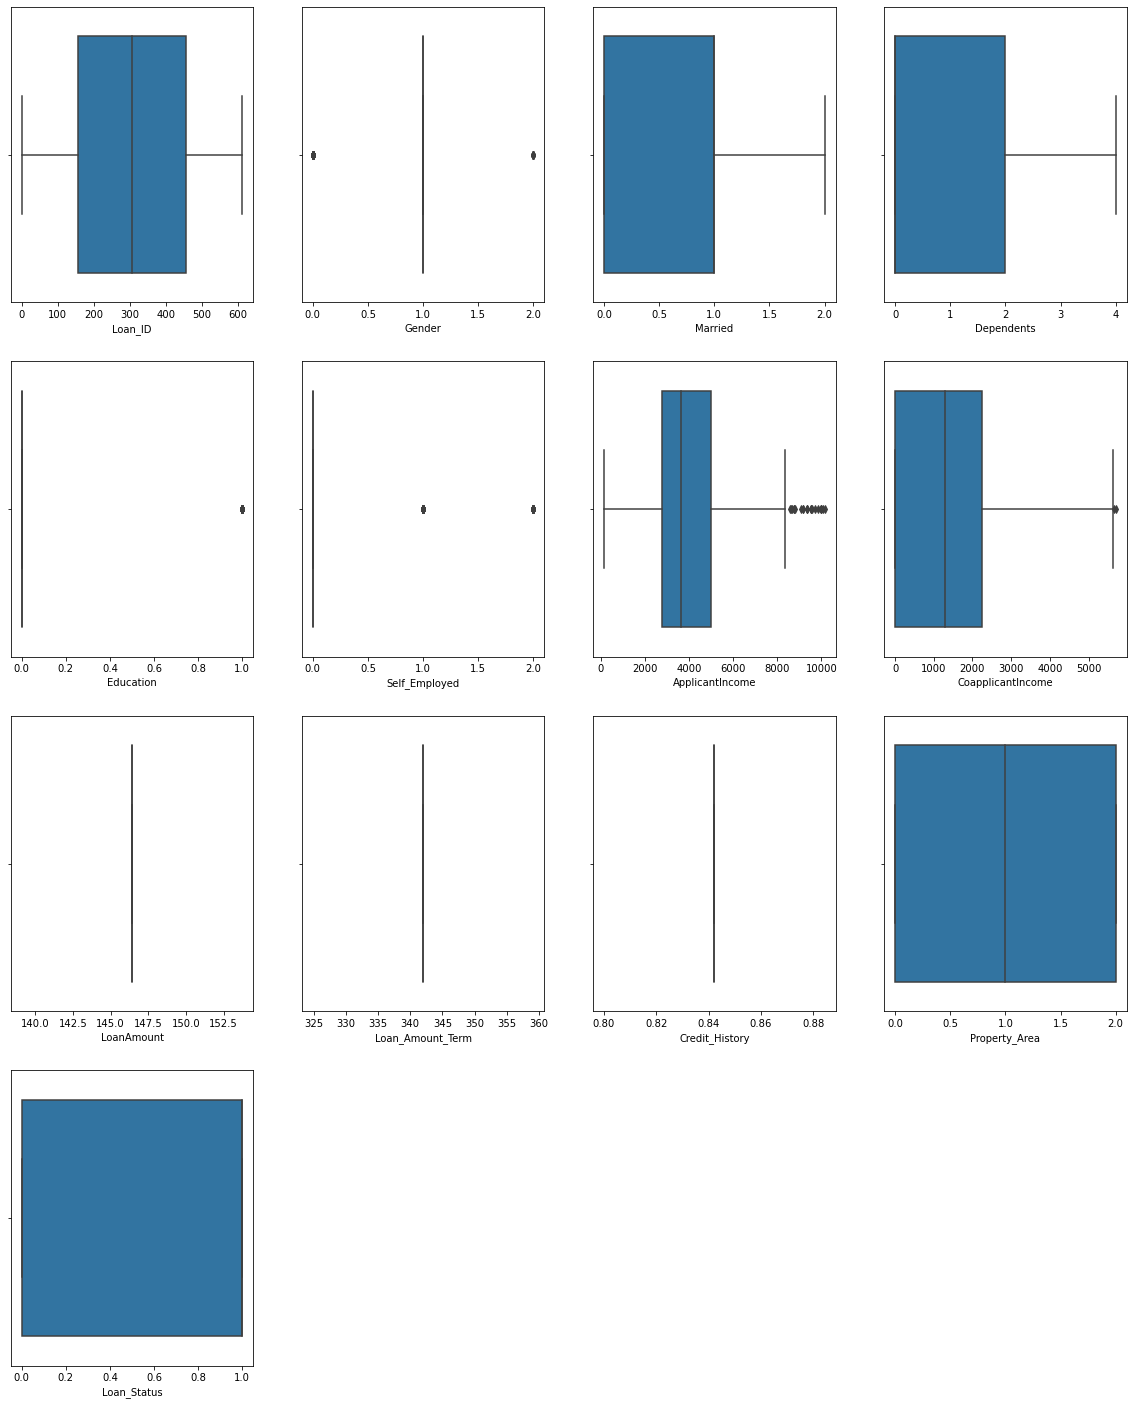

In [51]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in df:
    if plotnumber<=30:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column)
        plotnumber+=1
plt.show()  

In [ ]:
# lets see the correlation 

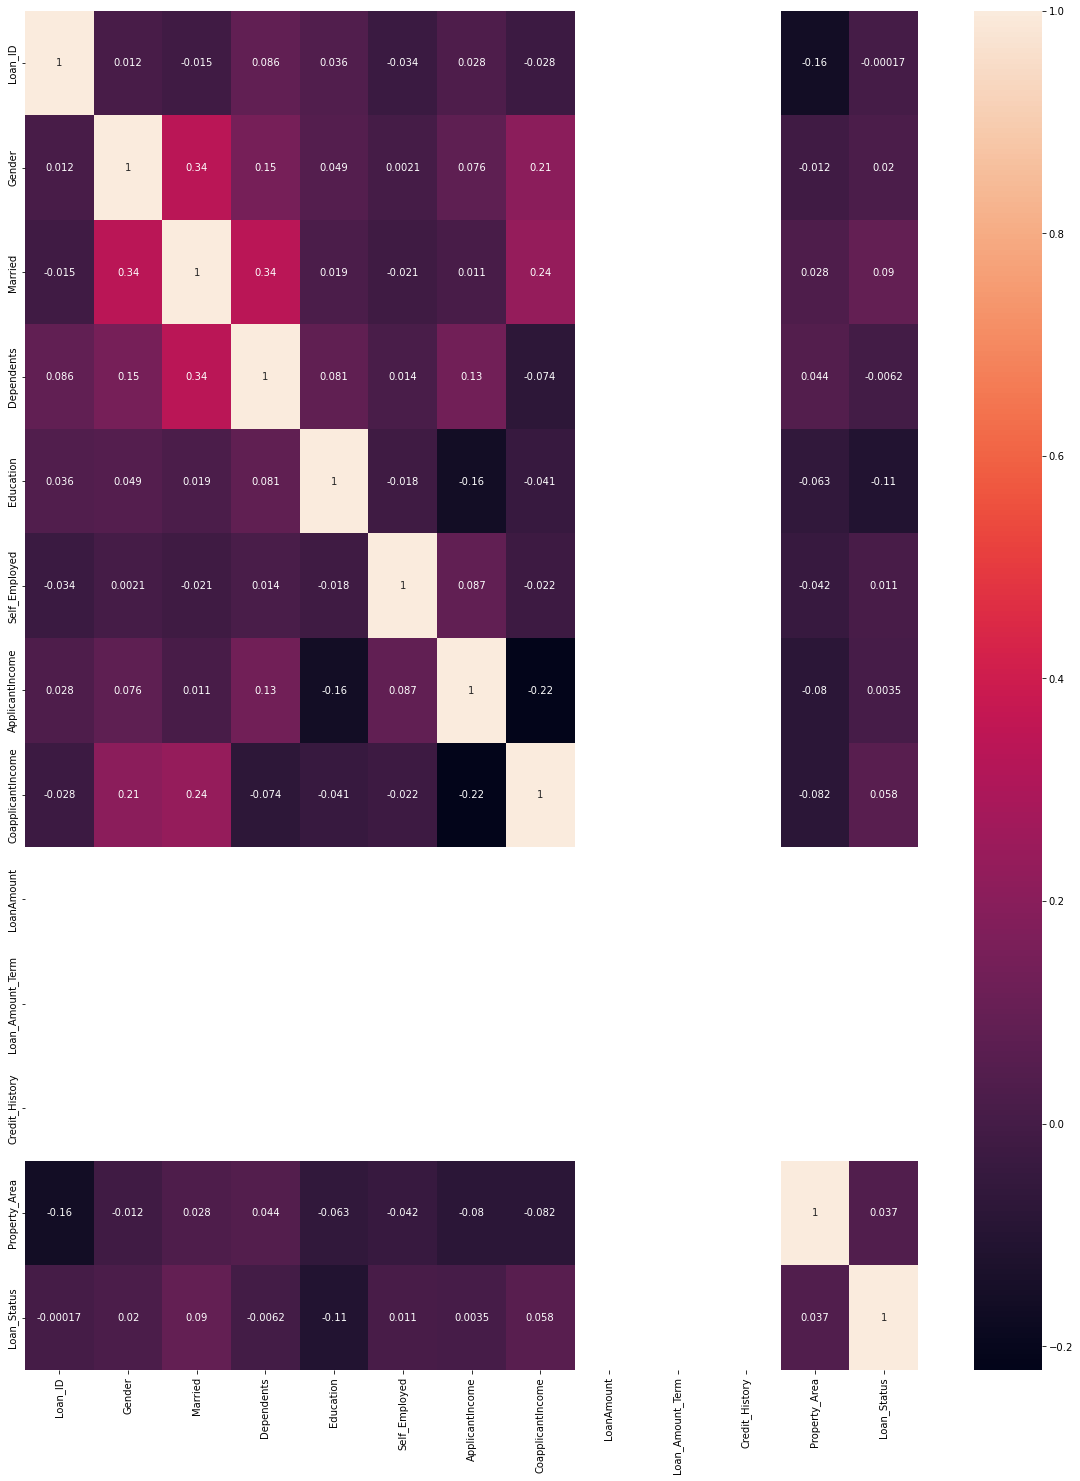

In [56]:
cor=df.corr()
plt.figure(figsize=(20,25))
sns.heatmap(cor,annot=True)
plt.show()

In [ ]:
# seperate feature and label

In [61]:
X=df.drop(columns=['Loan_Status'])
y=df['Loan_Status']
print(X.shape)
print(y.shape)

(548, 12)
(548,)


In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=348)
y_train.head()

550    0
85     1
597    0
272    1
263    1
Name: Loan_Status, dtype: int32

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [66]:
lr=LogisticRegression() 
knn=KNeighborsClassifier() 
dt=DecisionTreeClassifier() 
rf=RandomForestClassifier() 
adb=AdaBoostClassifier()    
svm=SVC()                
gdboost=GradientBoostingClassifier()   
print("Model is created")

Model is created


In [67]:
lr.fit(X_train, y_train)
knn.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
adb.fit(X_train,y_train)
svm.fit(X_train,y_train)
gdboost.fit(X_train,y_train)
print("Model is trained")

Model is trained


In [68]:
print("Lr classification score",lr.score(X_train,y_train))
print("knn classification score",knn.score(X_train,y_train))
print("dt classification score",dt.score(X_train,y_train))
print("rf classification score",rf.score(X_train,y_train))
print("adb classification score",adb.score(X_train,y_train))
print("svm classification score",svm.score(X_train,y_train))
print("gdboost classification score",gdboost.score(X_train,y_train))


Lr classification score 0.7007299270072993
knn classification score 0.7712895377128953
dt classification score 1.0
rf classification score 1.0
adb classification score 0.7639902676399026
svm classification score 0.7007299270072993
gdboost classification score 0.8953771289537713


In [ ]:
# lets see who have less relation droping that column and see how model give score

In [80]:
df=df.drop('LoanAmount',axis=1)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,342.0,0.842199,2,1
1,1,1,1,1,0,0,4583,1508.0,342.0,0.842199,0,0
2,2,1,1,0,0,1,3000,0.0,342.0,0.842199,2,1
3,3,1,1,0,1,0,2583,2358.0,342.0,0.842199,2,1
4,4,1,0,0,0,0,6000,0.0,342.0,0.842199,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,342.0,0.842199,0,1
610,610,1,1,3,0,0,4106,0.0,342.0,0.842199,0,1
611,611,1,1,1,0,0,8072,240.0,342.0,0.842199,2,1
612,612,1,1,2,0,0,7583,0.0,342.0,0.842199,2,1


In [81]:
df=df.drop('Loan_Amount_Term',axis=1)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,0.842199,2,1
1,1,1,1,1,0,0,4583,1508.0,0.842199,0,0
2,2,1,1,0,0,1,3000,0.0,0.842199,2,1
3,3,1,1,0,1,0,2583,2358.0,0.842199,2,1
4,4,1,0,0,0,0,6000,0.0,0.842199,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,0.842199,0,1
610,610,1,1,3,0,0,4106,0.0,0.842199,0,1
611,611,1,1,1,0,0,8072,240.0,0.842199,2,1
612,612,1,1,2,0,0,7583,0.0,0.842199,2,1


In [82]:
df=df.drop('Credit_History',axis=1)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,2,1
1,1,1,1,1,0,0,4583,1508.0,0,0
2,2,1,1,0,0,1,3000,0.0,2,1
3,3,1,1,0,1,0,2583,2358.0,2,1
4,4,1,0,0,0,0,6000,0.0,2,1
...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,0,1
610,610,1,1,3,0,0,4106,0.0,0,1
611,611,1,1,1,0,0,8072,240.0,2,1
612,612,1,1,2,0,0,7583,0.0,2,1


In [83]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,2,1
1,1,1,1,1,0,0,4583,1508.0,0,0
2,2,1,1,0,0,1,3000,0.0,2,1
3,3,1,1,0,1,0,2583,2358.0,2,1
4,4,1,0,0,0,0,6000,0.0,2,1
...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,0,1
610,610,1,1,3,0,0,4106,0.0,0,1
611,611,1,1,1,0,0,8072,240.0,2,1
612,612,1,1,2,0,0,7583,0.0,2,1


In [84]:
df.shape

(548, 10)

In [85]:
Xc=df.drop(columns=['Loan_Status'])
yc=df['Loan_Status']
print(X.shape)
print(y.shape)

(548, 12)
(548,)


In [86]:
Xc_train,Xc_test,yc_train,yc_test=train_test_split(Xc,yc,test_size=0.25,random_state=348)
yc_train.head()

550    0
85     1
597    0
272    1
263    1
Name: Loan_Status, dtype: int32

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [90]:
print("Lr classification score",lr.score(X_train,y_train))

Lr classification score 0.7007299270072993
